# Testing For Traget1: **Livello_Acqua**

## Set UP

In [1]:
import matplotlib as mpl
import os
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import pickle
from xgboost import XGBRegressor
import shap

c:\Users\nabil\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
os.chdir("../")
print(os.getcwd())

c:\Users\nabil\Downloads\Progetto_industry


## Testing of XGBoost

Si caricano i dati di test e il modello salvato

In [3]:
xgb_test_data = pd.read_csv('Data/Prepared/test_SL.csv')
xgb_test_data['Data'] = pd.to_datetime(xgb_test_data['Data'], format="%Y-%m-%d")
xgb_test_data.set_index('Data', inplace=True)
X_test_final = xgb_test_data.drop(['Target'],axis=1)
y_test_final = xgb_test_data['Target']

In [4]:
xgb = pickle.load(open('Models/XGB_model_LA.sav', 'rb'))

Si effettua la predizione sul test

In [5]:
prediction = xgb.predict(X_test_final)

In [6]:
y_test_final = pd.DataFrame(y_test_final)
y_test_final['prediction'] = prediction

Si visualizza l'andamento prediction vs true value

FixedFormatter should only be used together with FixedLocator


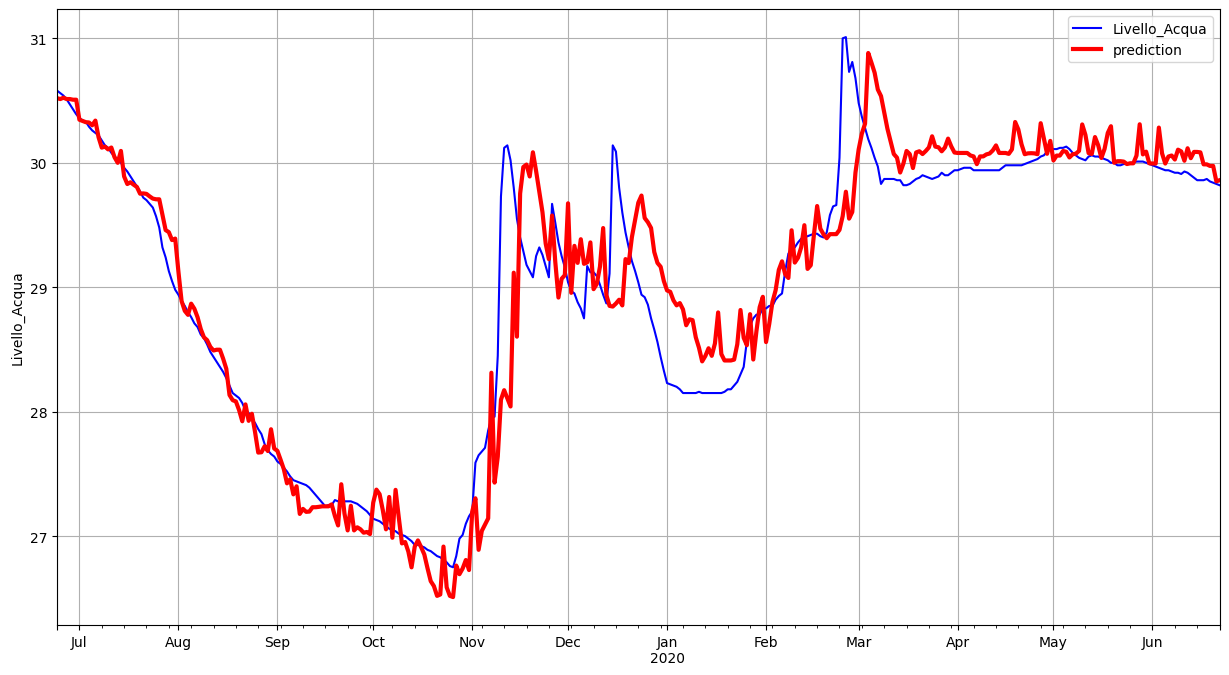

In [7]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
title=''
ylabel='Livello_Acqua'
xlabel='' 
y_test_final.columns = ['Livello_Acqua', 'prediction']
ax = y_test_final['Livello_Acqua'].plot(legend=True,figsize=(15,8),title=title, color = 'blue')
y_test_final['prediction'].plot(legend=True, title=title, color ='red',linewidth=3)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rc('font', **font)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

Si valuta l'errore quadratico medio.

In [8]:
mean_squared_error( prediction,y_test_final.Livello_Acqua)

0.1532474631014794

## Best Model Analysis

Si valuta la feature importance con il metodo di shap

In [9]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test_final)

In [10]:
X_test_final.columns

Index(['Pioggia_Zona_1', 'Pioggia_Zona_2', 'Pioggia_Zona_3', 'Pioggia_Zona_4',
       'Pioggia_Zona_5', 'Temperatura_Zona_5', 'Portata_Uscita', 'autumn',
       'spring', 'summer', 'winter', 'month', 'year', 'Pioggia_mediana',
       'Pioggia_std', 'Livello_Acqua_lag0', 'Livello_Acqua_lag1',
       'Livello_Acqua_lag2', 'Livello_Acqua_lag3', 'Livello_Acqua_lag4',
       'Livello_Acqua_lag5', 'Livello_Acqua_lag6', 'Livello_Acqua_mediana',
       'Livello_Acqua_std'],
      dtype='object')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


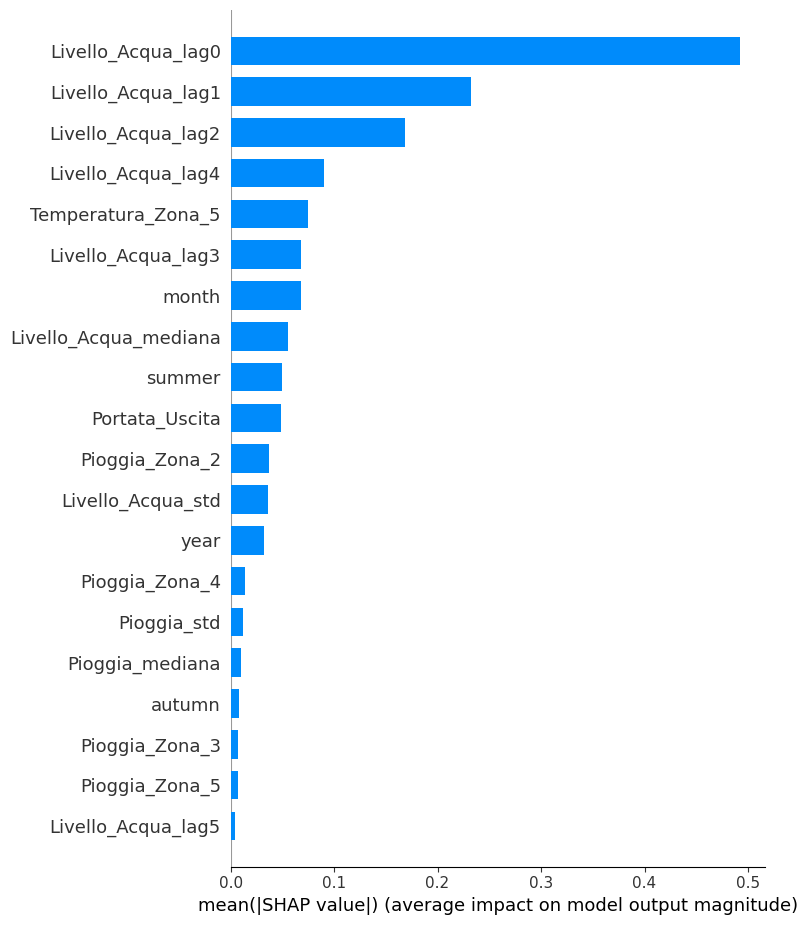

In [11]:
shap.summary_plot(shap_values, X_test_final, plot_type="bar" )

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


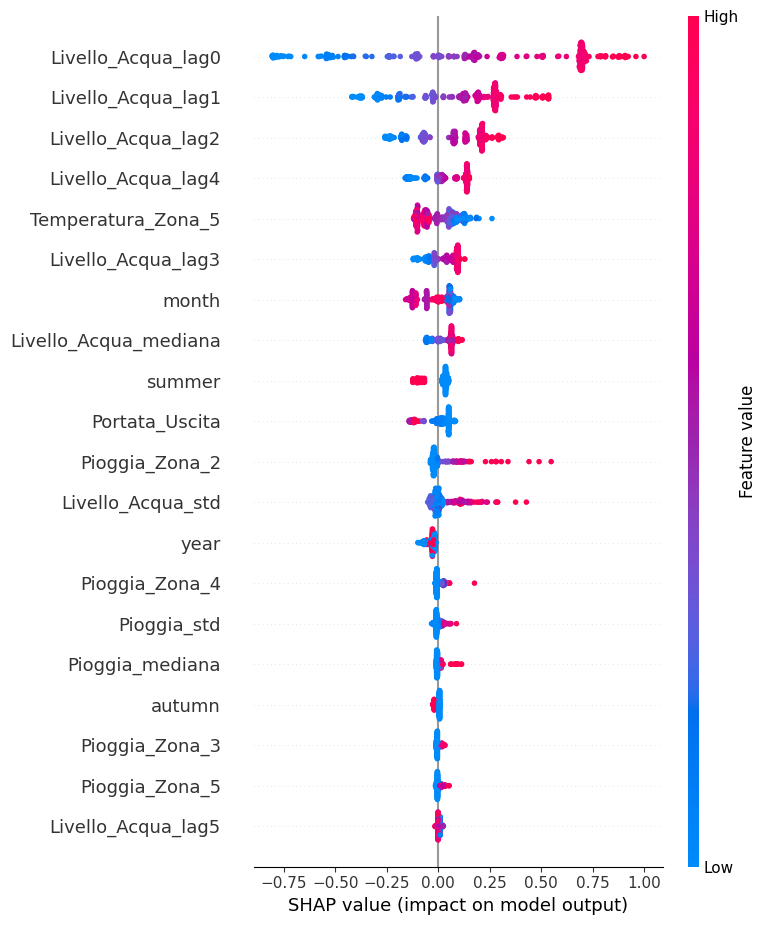

In [12]:
shap.summary_plot(shap_values, X_test_final)

# Testing For Traget2: **Portata Uscita**

## Testing of XGBoost

Si caricano i dati di test e il modello salvato.

In [13]:
test_PU_SL = pd.read_csv('Data/Prepared/test_PU_SL.csv')
test_PU_SL['Data'] = pd.to_datetime(test_PU_SL['Data'], format="%Y-%m-%d")
test_PU_SL.set_index('Data', inplace=True)
X_test_final = test_PU_SL.drop(['Target'],axis=1)
y_test_final = test_PU_SL['Target']

In [14]:
xgb = pickle.load(open('Models/XGB_model_PU.sav', 'rb'))

Si effettua la predizione sul test.

In [15]:
prediction = xgb.predict(X_test_final)

In [16]:
y_test_final = pd.DataFrame(y_test_final)
y_test_final['prediction'] = prediction

Si visualizza l'andamento prediction vs true value.

FixedFormatter should only be used together with FixedLocator
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


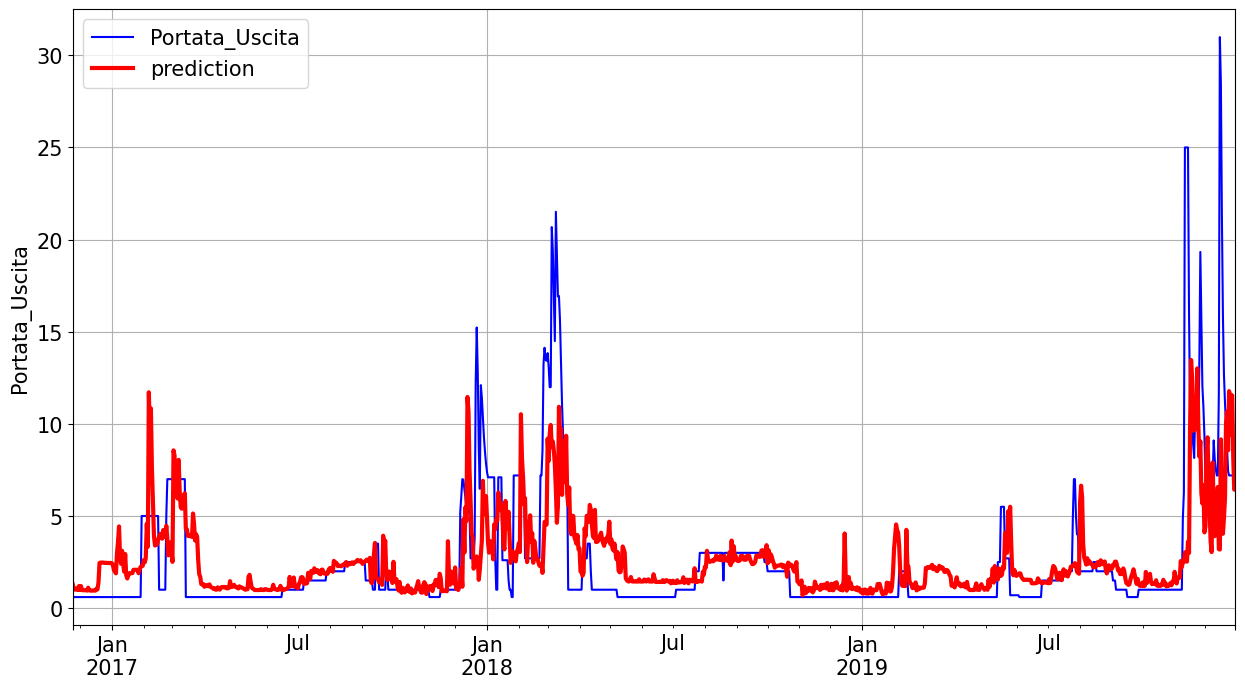

In [17]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
title=''
ylabel='Portata_Uscita'
xlabel='' 
y_test_final.columns = ['Portata_Uscita', 'prediction']
ax = y_test_final['Portata_Uscita'].plot(legend=True,figsize=(15,8),title=title, color = 'blue')
y_test_final['prediction'].plot(legend=True, title=title, color ='red',linewidth=3)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rc('font', **font)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

Si valuta l'errore quadratico medio.

In [18]:
mean_squared_error( prediction,y_test_final.Portata_Uscita)

7.725233061974565

## Best Model Analysis

Si valuta la feature importance con il metodo di shap.

In [19]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test_final)

In [20]:
X_test_final.columns

Index(['Pioggia_Zona_1', 'Pioggia_Zona_2', 'Pioggia_Zona_3', 'Pioggia_Zona_4',
       'Pioggia_Zona_5', 'Temperatura_Zona_5', 'Livello_Acqua', 'autumn',
       'spring', 'summer', 'winter', 'year', 'month', 'day_in_year',
       'week_in_year', 'Temperatura_Trend', 'Temperatura_Season',
       'Temperatura_Resid', 'Pioggia_Zona_1_diff_1', 'Pioggia_Zona_2_diff_1',
       'Pioggia_Zona_3_diff_1', 'Pioggia_Zona_4_diff_1',
       'Pioggia_Zona_5_diff_1', 'Livello_Acqua_diff_1',
       'Portata_Uscita_diff_1', 'Pioggia_Zona_1_diff_2',
       'Pioggia_Zona_2_diff_2', 'Pioggia_Zona_3_diff_2',
       'Pioggia_Zona_4_diff_2', 'Pioggia_Zona_5_diff_2',
       'Livello_Acqua_diff_2', 'Portata_Uscita_diff_2',
       'Pioggia_Zona_1_diff_3', 'Pioggia_Zona_2_diff_3',
       'Pioggia_Zona_3_diff_3', 'Pioggia_Zona_4_diff_3',
       'Pioggia_Zona_5_diff_3', 'Livello_Acqua_diff_3',
       'Portata_Uscita_diff_3', 'Pioggia_Zona_1_diff_4',
       'Pioggia_Zona_2_diff_4', 'Pioggia_Zona_3_diff_4',
       'Pi

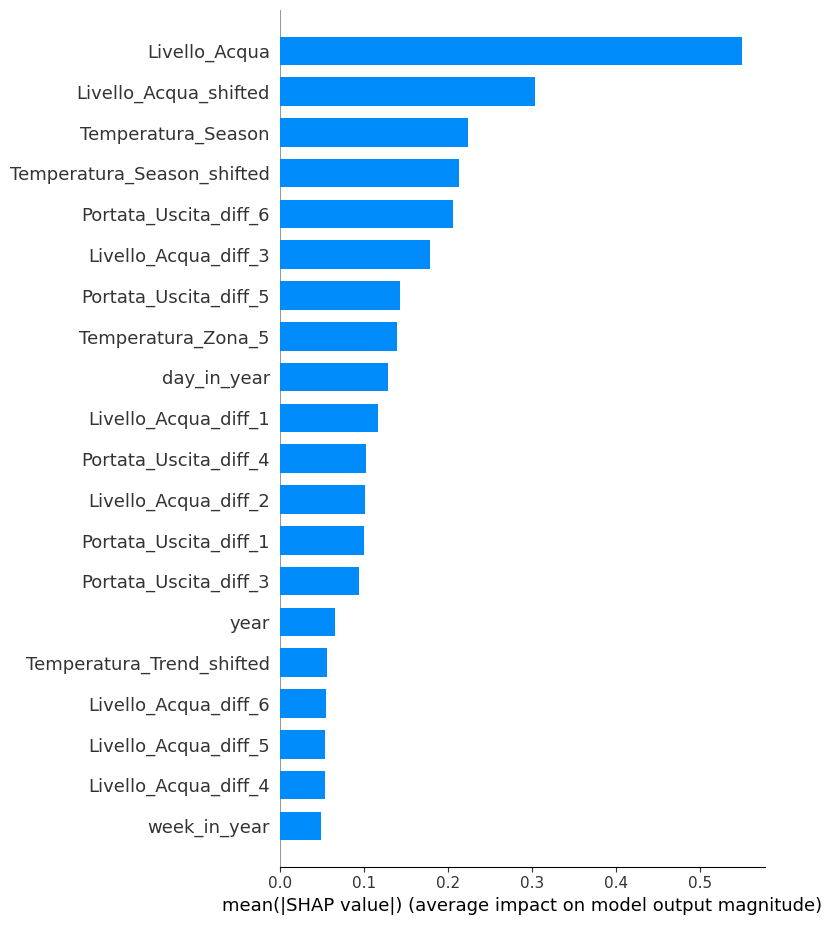

In [21]:
shap.summary_plot(shap_values, X_test_final, plot_type="bar" )

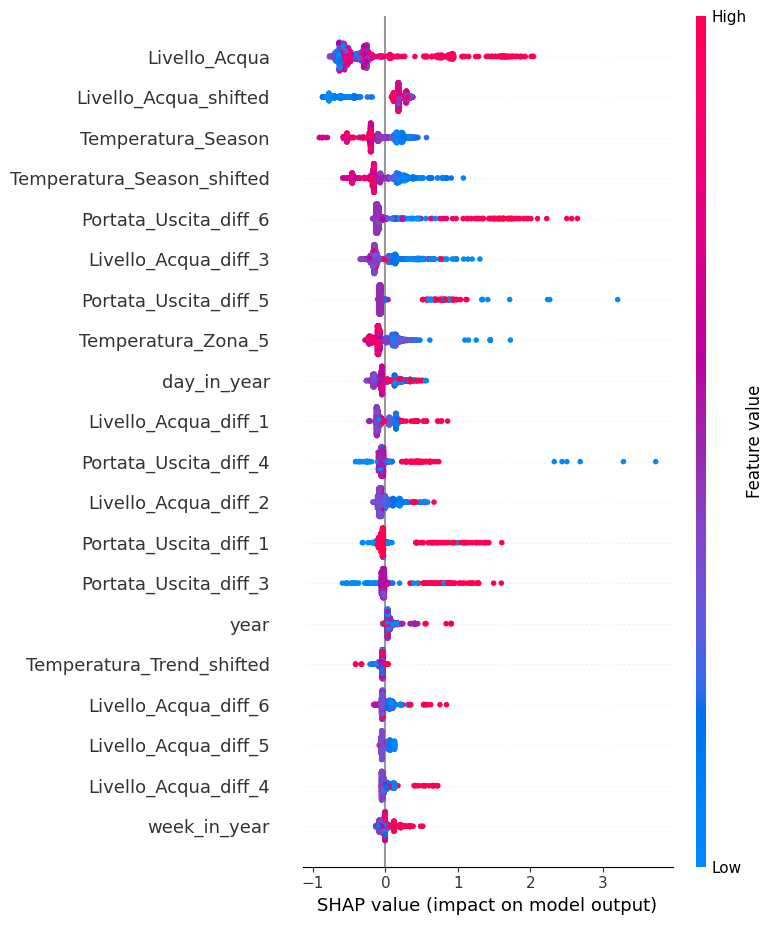

In [22]:
shap.summary_plot(shap_values, X_test_final)